# DEMO: Das Knapsack-Problem

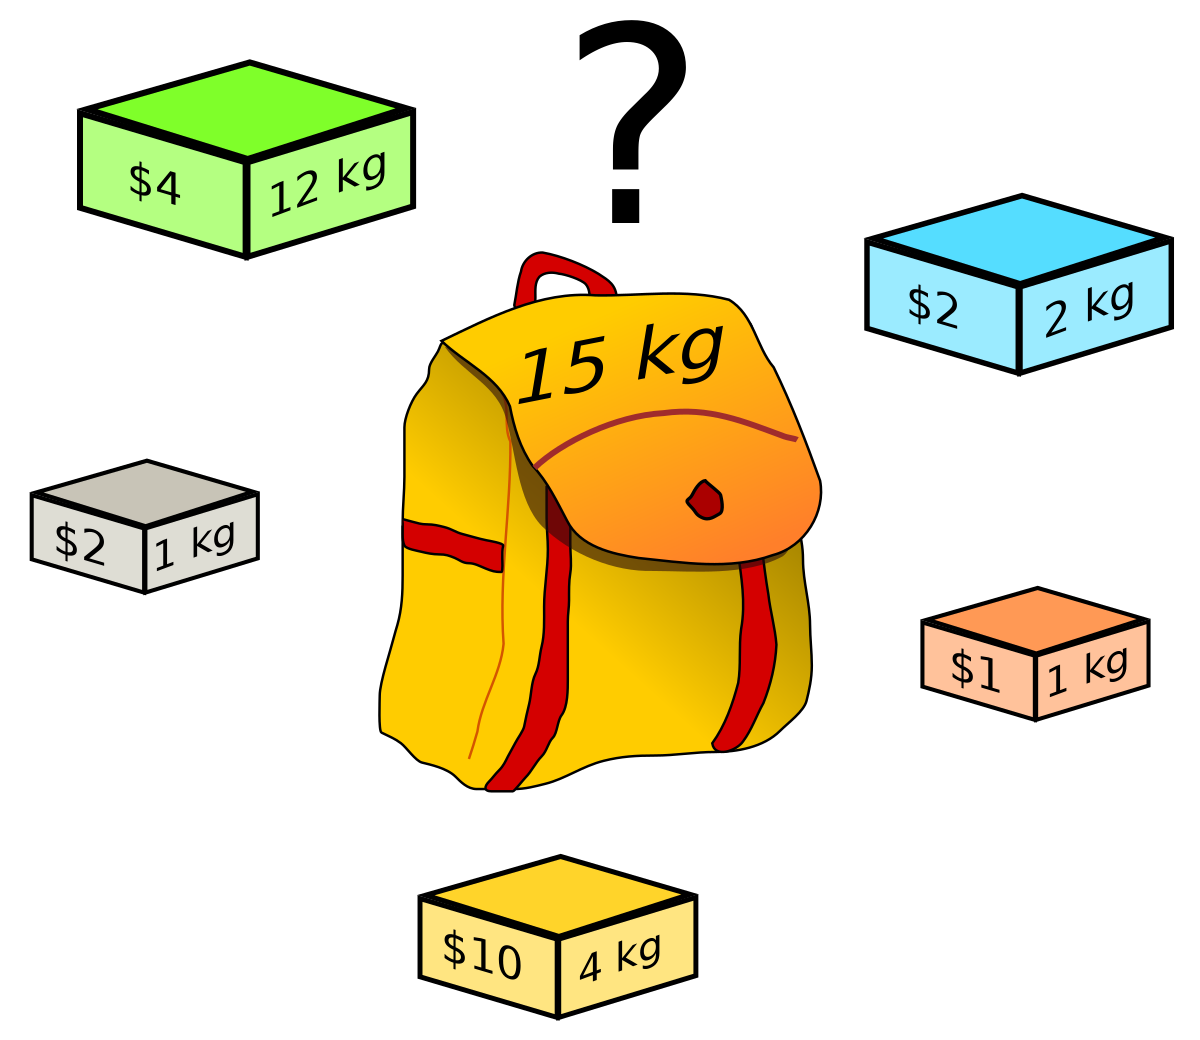

Beim knapsack-Problem müssen Sie einen Satz von Elementen mit bestimmten Werten und Größen (z. B. Gewichtungen oder Volumen) in einen Container mit maximaler Kapazität packen. Wenn die Gesamtgröße der Artikel die Kapazität überschreitet, können Sie nicht alle Artikel packen. In diesem Fall besteht das Problem darin, eine Teilmenge der Elemente mit maximalem Gesamtwert auszuwählen, die in den Container passen.

In den folgenden Abschnitten wird beschrieben, wie Sie ein Rucksackproblem mithilfe von Google OR-Tools lösen.

---
Links/Source:  
+ [Google OR Tools](https://developers.google.com/optimization/pack/knapsack?hl=de#complete_programs)  

---  
History:  
+ Mai 2024, v1, dbe --- adapted for BINA FS24

In [ ]:
!pip install ortools

In [3]:
from ortools.algorithms.python import knapsack_solver

In [ ]:
# Create the solver.
solver = knapsack_solver.KnapsackSolver(knapsack_solver.SolverType.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER, "KnapsackExample")

In [6]:
# Set values, weights and capacity
values = [
        # fmt:off
      360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
      78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
      87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
      312
        # fmt:on
    ]

weights = [
        # fmt: off
      [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
       42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
       3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13],
        # fmt: on
    ]

capacities = [850]

In [8]:
solver.init(values, weights, capacities)
computed_value = solver.solve()

In [9]:
packed_items = []
packed_weights = []
total_weight = 0

for i in range(len(values)):
        if solver.best_solution_contains(i):
            packed_items.append(i)
            packed_weights.append(weights[0][i])
            total_weight += weights[0][i]

In [11]:
print("Total value   =", computed_value)

print("Total weight  :", total_weight)
print("Packed items  :", packed_items)
print("Packed_weights:", packed_weights)

Total value   = 7534
Total weight  : 850
Packed items  : [0, 1, 3, 4, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 34, 38, 39, 41, 42, 44, 47, 48, 49]
Packed_weights: [7, 0, 22, 80, 11, 59, 18, 0, 3, 8, 15, 42, 9, 0, 47, 52, 26, 6, 29, 84, 2, 4, 18, 7, 71, 3, 66, 31, 0, 65, 52, 13]
